In [1]:
import gym
from gym_super_mario_bros import make
from gym.wrappers import FrameStack, GrayScaleObservation
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from stable_baselines3.common.callbacks import CheckpointCallback
from nes_py.wrappers import JoypadSpace
from 

ModuleNotFoundError: No module named 'gym_super_mario_bros'

In [2]:
import torch
from n


In [10]:
# 创建超级马里奥环境
import torch
from gym import Wrapper
from gym_super_mario_bros import make

# from gym.wrappers import EnvCompatibility
ACTIONS = [['NOOP'], ['right'], ['right', 'A'], ['A']]

env = make("SuperMarioBros-1-1-v0",apply_api_compatibility=True)
# env = make("SuperMarioBros-1-1-v0")

# env = JoypadSpace(env, ACTIONS)
# 灰度处理以减少观察空间复杂度
env = GrayScaleObservation(env, keep_dim=False)
num_envs = 4

# # 堆叠连续帧，帮助智能体感知运动
env = FrameStack(env, num_stack=4)
# print(env)
# env = EnvCompatibility(env)

# 向量化环境，支持并行采样
env = DummyVecEnv([lambda: env]*num_envs )

# 创建 PPO 模型
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")



In [11]:
obs= env.reset()

In [12]:
obs.shape

(4, 4, 240, 256)

In [13]:
actions = [env.action_space.sample() for _ in range(num_envs)]


In [14]:
import gym

In [15]:
class sky_env(gym):
    def __init__(self):
        self.init_state = (0,0)
        self.velodity = 0
        self.accler = 0
        self.
    
    

SyntaxError: invalid syntax (3935015752.py, line 6)

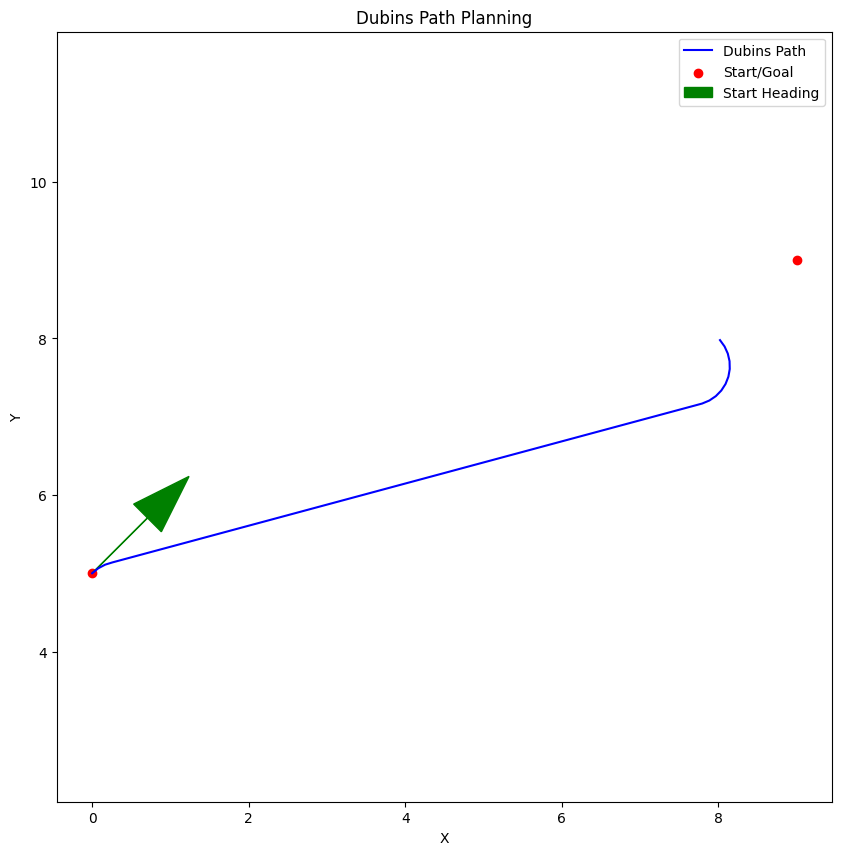

In [65]:
import dubins
import numpy as np
import matplotlib.pyplot as plt

# 定义起点和终点 (x, y, θ)
start = (0, 5, np.deg2rad(45))  # 起点: (x=0, y=0, 航向角=0°)
goal = (8, 8, np.deg2rad(225-90))  # 终点: (x=10, y=10, 航向角=90°)  ##每次就是突击其后面  敌方实际的角度-90导入path-> +90导入是右边
real_goal_theta = np.deg2rad(225)
# 最小转弯半径
turning_radius = 0.5

# 生成最短路径
path = dubins.shortest_path(start, goal, turning_radius)

# 采样路径上的点
configurations, _ = path.sample_many(0.1)  # 采样间隔为0.1

# 提取 x, y 坐标
x_coords = [config[0] for config in configurations]
y_coords = [config[1] for config in configurations]

# 可视化路径
plt.figure(figsize=(10, 10))
plt.plot(x_coords, y_coords, label="Dubins Path", color='b')
plt.scatter([start[0], goal[0]+1], [start[1], goal[1]+1], color='r', label="Start/Goal")
plt.arrow(start[0], start[1], 1 * np.cos(start[2]), 1 * np.sin(start[2]), color='g', head_width=0.5, label="Start Heading")
# plt.arrow(goal[0]-1, goal[1]-1, 1 * np.cos(goal[2]), 1 * np.sin(goal[2]), color='orange', head_width=0.5, label="Goal Heading")
# plt.arrow(goal[0], goal[1], 1 * np.cos(real_goal_theta), 1 * np.sin(real_goal_theta), color='red', head_width=0.7, label="real Goal Heading")

plt.axis('equal')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dubins Path Planning")
plt.show()


path <dubins._DubinsPath object at 0x28b02c950>
采集点 [(5.0, 5.0, 3.141592653589793), (4.800333166706343, 5.009991669443949, 3.041592653589793), (4.602661338409877, 5.039866844317517, 2.941592653589793), (4.408959586677321, 5.0893270217487885, 2.8415926535897933), (4.221163315382699, 5.15787801199423, 2.741592653589793), (4.041148922791594, 5.2448348762192545, 2.641592653589793), (3.8707150532099295, 5.349328770180644, 2.541592653589793), (3.7115646255246175, 5.470315625431024, 2.441592653589793), (3.5652878182009546, 5.606586581305669, 2.3415926535897933), (3.4333461807450334, 5.756780063458671, 2.241592653589793), (3.317058030384207, 5.9193953882637205, 2.141592653589793), (3.21758527987713, 6.092807757148845, 2.0415926535897935), (3.1359218280655474, 6.275284491046653, 1.9415926535897932), (3.0728836291656143, 6.465002342750825, 1.841592653589793), (3.0291005400230797, 6.6600657141995185, 1.741592653589793), (3.0050100267918913, 6.858525596664595, 1.641592653589793), (3.00085279391699

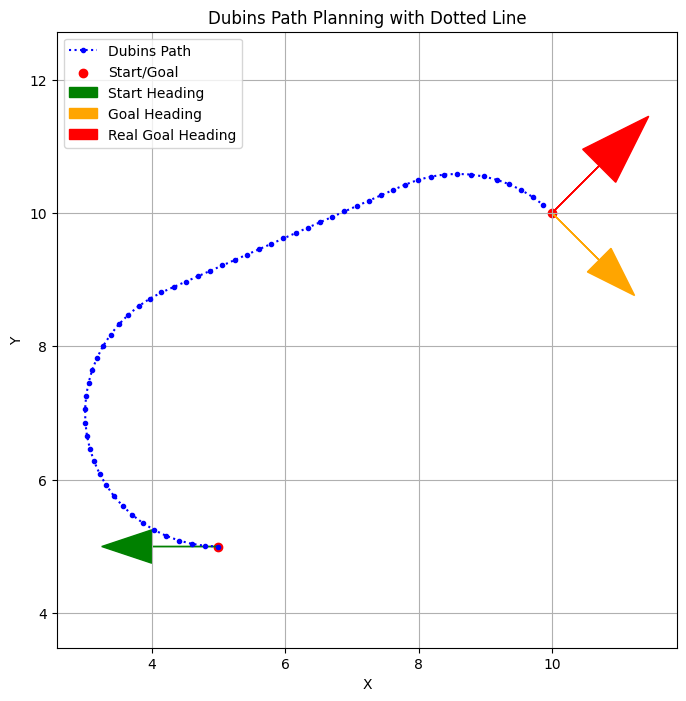

In [67]:
import dubins
import numpy as np
import matplotlib.pyplot as plt

# 定义起点和终点 (x, y, θ)
start = (5, 5, np.deg2rad(180))  # 起点: (x=0, y=0, 航向角=180°)
goal = (10, 10, np.deg2rad(-45))  # 终点: (x=10, y=10, 航向角=-45°)
real_goal_theta = np.deg2rad(45)  # 实际目标角度

# 最小转弯半径
turning_radius = 2.0

# 生成最短路径
path = dubins.shortest_path(start, goal, turning_radius)
print('path',path)
# 采样路径上的点
configurations, _ = path.sample_many(0.2)  # 采样间隔为0.1
print('采集点',configurations)
# 提取 x, y 坐标
x_coords = [config[0] for config in configurations]
y_coords = [config[1] for config in configurations]

# 可视化路径
plt.figure(figsize=(8, 8))

# 绘制点状路径
plt.plot(x_coords, y_coords, linestyle=':', marker='o', markersize=3, color='b', label="Dubins Path")

# 绘制起点和终点
plt.scatter([start[0], goal[0]], [start[1], goal[1]], color='r', label="Start/Goal")

# 绘制起点和终点的航向箭头
plt.arrow(start[0], start[1], 1 * np.cos(start[2]), 1 * np.sin(start[2]), color='g', head_width=0.5, label="Start Heading")
plt.arrow(goal[0], goal[1], 1 * np.cos(goal[2]), 1 * np.sin(goal[2]), color='orange', head_width=0.5, label="Goal Heading")

# 绘制实际目标航向箭头
plt.arrow(goal[0], goal[1], 1 * np.cos(real_goal_theta), 1 * np.sin(real_goal_theta), color='red', head_width=0.7, label="Real Goal Heading")

# 设置图形属性
plt.axis('equal')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dubins Path Planning with Dotted Line")
plt.grid(True)
plt.show()

In [24]:
class Drone:
    def __init__(self, x=0, y=0, theta=45, T_tg=0, T_tc=0, Destroy=0, num_enemies=2, num_tactics=3, drone_id=None):
        self.x = x
        self.y = y
        self.theta = theta
        self.id = drone_id
        self.Tg = T_tg  # 决定goal的坐标
        self.Tc = T_tc  # 决定规划的角度
        self.Destroy = Destroy
        self.velocity = 1
        self.num_missle = 2
        self.omega = 0

        # 感知信息
        self.friends = {}  # 使用字典存储队友信息
        self.enemies = []  # 敌方的信息

        # # 决策信息
        # self.X = np.array(enemy_drone)  # 敌人攻击决策
        # self.Y = np.zeros((num_enemies, num_tactics))  # 战术选择


    def move(self, time_step):
        self.x += self.velocity * np.cos(np.radians(self.theta)) * time_step
        self.y += self.velocity * np.sin(np.radians(self.theta)) * time_step
        self.theta = (self.theta + self.omega * time_step) % 360

    def launch_missile(self, enemy):
        dx = enemy[0] - self.x
        dy = enemy[1] - self.y
        distance = np.sqrt(dx**2 + dy**2)

        angle_to_enemy = np.degrees(np.arctan2(dy, dx))  # 将弧度转换为度
        angle_diff = angle_to_enemy - self.theta
        angle_diff = (angle_diff + 180) % 360 - 180  # 归一化到 [-180, 180]

        if distance <= 5 and abs(angle_diff) <= 10:
            print(f"Missile launched at enemy at position ({enemy[0]}, {enemy[1]})")
            self.num_missle -= 1

    def receive_attack(self):
        attack_probability = 0.8
        if random.random() < attack_probability:
            self.Destroy = 1
            print(f"Drone {self.id} has been destroyed!")
        else:
            print(f"Drone {self.id} evaded the attack!")

    def sense_enemy(self, enemies, radar_range=100, radar_angle=30):
        """
        感知敌方：如果敌方在雷达范围内且角度在雷达扇形内，则感知到敌方的位置和角度。
        """
        detected_enemies = []
        
        for enemy in enemies:
            # 计算敌人与当前无人机的相对距离
            dx = enemy[0] - self.x
            dy = enemy[1] - self.y
            distance = np.sqrt(dx**2 + dy**2)

            # 判断是否在雷达范围内
            if distance <= radar_range:
                # 计算敌人相对于当前无人机的角度
                angle_to_enemy = np.degrees(np.arctan2(dy, dx))  # 将弧度转换为度

                # 计算敌人与当前无人机的角度差
                angle_diff = angle_to_enemy - self.theta
                angle_diff = (angle_diff + 180) % 360 - 180  # 保证角度差在 [-180, 180]

                # 判断是否在雷达扇形范围内
                if abs(angle_diff) <= radar_angle:
                    detected_enemies.append([enemy[0], enemy[1], angle_to_enemy])
        
        return detected_enemies

In [25]:
class FriendlyDrone(Drone):
    def __init__(self, x=0, y=0, theta=45, T_tg=0, T_tc=0, Destroy=0, num_enemies=1, num_tactics=3, drone_id=None):
        super().__init__(x, y, theta, T_tg, T_tc, Destroy, num_enemies, num_tactics, drone_id)
        self.path_points=[]
        self.current_path_index =0

    def communicate(self, all_drones):
        my_state = [self.x, self.y, self.theta, self.Tg, self.Tc, self.Destroy]
        for drone in all_drones:
            if drone.id != self.id:
                drone.receive_message(self.id, my_state)

    def receive_message(self, sender_id, state):
        friend_x, friend_y, friend_theta, friend_Tg, friend_Tc, friend_Destroy = state
        friend_x -= self.x
        friend_y -= self.y
        friend_theta -= self.theta
        self.friends[self.id] = (self.x, self.y, self.theta, self.Tg, self.Tc, self.Destroy)
        
        if sender_id in self.friends:
            self.friends[sender_id] = (friend_x, friend_y, friend_theta, friend_Tg, friend_Tc, friend_Destroy)
        else:
            self.friends[sender_id] = (friend_x, friend_y, friend_theta, friend_Tg, friend_Tc, friend_Destroy)

        sorted_friends = sorted(self.friends.items(), key=lambda item: item[0])
        return [friend[1] for friend in sorted_friends]

    def plan_road(self,goal):
        start = [self.x, self.y, self.theta]
        if self.Tc == 1:
            goal[2] -= 90
        elif self.Tc == 2:
            goal[2] += 90
        turning_radius = 2.0
        path = dubins.shortest_path(start, goal, turning_radius)

        sample_points = path.sample_many(0.5)  # 每 0.5 单位距离采样一次
        self.path_points = sample_points[0] # 存储路径点
        self.current_path_index = 0        # 重置当前路径点索引
    def move(self,time_step):
  
         if self.current_path_index < len(self.path_points):
            # 获取当前目标路径点
            target = self.path_points[self.current_path_index]     ####path_points是 turple list，第一个元素是一堆三元组，第二个元素是插值排名
            print('target',target)
            target_x, target_y, target_theta_rad = target
             
            
            # 计算目标方向（转换为度数）
            dx = target_x - self.x
            dy = target_y - self.y
            # target_angle = np.degrees(np.arctan2(dy, dx))
            theta_deg = np.rad2deg(target_theta_rad)
            # 计算角度差并调整转向
            angle_diff = (theta_deg - self.theta + 180) % 360 - 180
            self.omega = 0.1 * angle_diff  # 控制转向速度
            
            # 更新当前角度
            self.theta += self.omega * time_step
            self.theta %= 360  # 保持角度在 [0, 360)
            
            # 计算当前步长（飞行的距离）
            distance_to_travel = self.velocity * time_step
            
            # 计算当前位置与目标点之间的距离
            dx_to_target = target_x - self.x
            dy_to_target = target_y - self.y
            distance_to_target = np.sqrt(dx_to_target**2 + dy_to_target**2)

            # 如果飞行的步长大于目标点与当前位置之间的距离，表示飞过了目标点
            if distance_to_target < distance_to_travel:
                # 更新位置到目标点，并且跳到下一个路径点
                self.x = target_x
                self.y = target_y
                self.current_path_index += 1
            else:#dd
                # 没飞过目标点，则按步长前进
                self.x += distance_to_travel * np.cos(np.radians(self.theta))
                self.y += distance_to_travel * np.sin(np.radians(self.theta))

            # 检查是否到达当前路径点
            if distance_to_target < 0.5:  # 接近当前路径点时切换到下一个
                self.current_path_index += 1
         else:
                    
            self.x += self.velocity * np.cos(np.radians(self.theta)) * time_step
            self.y += self.velocity * np.sin(np.radians(self.theta)) * time_step
            self.theta = (self.theta + self.omega * time_step) % 360
            print("Path completed!")  # 路径完成
       

class EnemyDrone(Drone):
    def __init__(self, x=0, y=0, theta=45, T_tg=0, T_tc=0, Destroy=0, num_enemies=2, num_tactics=3, drone_id=None):
        super().__init__(x, y, theta, T_tg, T_tc, Destroy, num_enemies, num_tactics, drone_id)

    def plan_road(self):
        # 敌方无人机的路径规划为水平直线
        start = [self.x, self.y, self.theta]
        goal = [self.x + 10, self.y, self.theta]  # 水平直线（可以根据需求调整）
        path = [start, goal]
        # 敌方无人机在水平方向上移动
        self.x += self.velocity * np.cos(np.radians(self.theta)) * 1  # 每次更新1步

    # 不实现通讯功能，敌方无人机无需与队友通信
    def communicate(self, all_drones):
        pass

    def receive_message(self, sender_id, state):
        pass

In [26]:
###测试
friendly_drone = FriendlyDrone(x=0, y=0, theta=45, drone_id=1)
enemy_drone1 = EnemyDrone(x=80, y=80, theta=-145, drone_id=2)
enemies = [(enemy_drone1.x, enemy_drone1.y)]
detected_enemies = friendly_drone.sense_enemy(enemies)
print("Detected enemies:", detected_enemies)


Detected enemies: []


In [27]:
import gym
from gym import spaces
import numpy as np
import random
import dubins
import matplotlib.pyplot as plt
from IPython import display

class AirFightEnv(gym.Env):
    def __init__(self):
        super(AirFightEnv, self).__init__()
        
        # 定义动作空间和观测空间
        self.action_space = spaces.Discrete(3)  # 0: 无动作, 1: 左突击, 2: 右突击
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(6,), dtype=np.float32)  # 观测空间为6维向量
        
        # 初始化无人机
        self.friendly_drone = FriendlyDrone(x=0, y=0, theta=45, drone_id=1)
        self.enemy_drone = EnemyDrone(x=80, y=80, theta=180, drone_id=2)
        self.friendly_path = []
        self.enemy_path = []
        
        # 初始化时间步长
        self.time_step = 1  # 每次step为1秒
        
        # 初始化状态
        self.state = None
        self.reset()
        
    def reset(self):
        # 重置环境状态
        self.friendly_drone = FriendlyDrone(x=0, y=0, theta=45, drone_id=1)
        self.enemy_drone = EnemyDrone(x=80, y=80, theta=180, drone_id=2)
        
        # 初始化状态向量
        self.state = np.array([
            self.friendly_drone.x,
            self.friendly_drone.y,
            self.friendly_drone.theta,
            self.friendly_drone.Destroy,
            self.enemy_drone.x,
            self.enemy_drone.y,
            self.enemy_drone.theta,
            self.friendly_drone.Destroy,

        ])
        
        return self.state

    def step(self, action):
        self.friendly_path.append((self.friendly_drone.x, self.friendly_drone.y))
        self.enemy_path.append((self.enemy_drone.x, self.enemy_drone.y))
        # 1. 己方无人机查看是否感知到敌方无人机
        detected_enemies = self.friendly_drone.sense_enemy([(self.enemy_drone.x, self.enemy_drone.y,self.enemy_drone.theta)])
        print('detected_enemies',detected_enemies)
        if detected_enemies:
            # 2. 如果感知到敌方无人机，选择战术进行路径规划
            if action == 1:  # 左突击
                self.friendly_drone.Tc = 1
            elif action == 2:  # 右突击
                self.friendly_drone.Tc = 2
            else:
                self.friendly_drone.Tc = 0
            
            # 进行路径规划
            self.friendly_drone.plan_road(detected_enemies[0])
        
        # 3. 移动无人机
        self.friendly_drone.move(self.time_step)
        self.enemy_drone.move(self.time_step)
        
        # 4. 检查是否到达攻击距离
        dx = self.enemy_drone.x - self.friendly_drone.x
        dy = self.enemy_drone.y - self.friendly_drone.y
        distance = np.sqrt(dx**2 + dy**2)
        
        if distance <= 5:
            # 发动攻击
            self.friendly_drone.launch_missile((self.enemy_drone.x, self.enemy_drone.y))
            
            # 检测是否攻击成功
            if self.friendly_drone.num_missle > 0:
                self.enemy_drone.receive_attack()
        
        # 5. 检测是否被攻击到
        # self.friendly_drone.receive_attack()
        
        # 更新状态
        self.state = np.array([
            self.friendly_drone.x,
            self.friendly_drone.y,
            self.friendly_drone.theta,
            self.enemy_drone.x,
            self.enemy_drone.y,
            self.enemy_drone.theta
        ])
        
        # 计算奖励
        reward = self.calculate_reward()
        
        # 检查是否结束
        done = self.check_done()
        
        return self.state, reward, done, {}

    def calculate_reward(self):
        # 奖励函数可以根据具体需求设计
        reward = 0
        
        # 如果敌方无人机被摧毁，给予正奖励
        if self.enemy_drone.Destroy == 1:
            reward += 100
        
        # 如果己方无人机被摧毁，给予负奖励
        if self.friendly_drone.Destroy == 1:
            reward -= 100
        
        # 根据距离给予奖励
        dx = self.enemy_drone.x - self.friendly_drone.x
        dy = self.enemy_drone.y - self.friendly_drone.y
        distance = np.sqrt(dx**2 + dy**2)
        
        if distance <= 5:
            reward += 10
        
        return reward

    def check_done(self):
        # 检查是否结束
        if self.friendly_drone.Destroy == 1 or self.enemy_drone.Destroy == 1:
            return True
        else:
            return False
    # def render(self, mode='human'):
    #     plt.figure(figsize=(10, 10))
        
    #     # 绘制己方无人机的路径
    #     friendly_x, friendly_y = zip(*self.friendly_path) if self.friendly_path else ([], [])
    #     plt.plot(friendly_x, friendly_y, 'b-', label="Friendly Path")
        
    #     # 绘制敌方无人机的路径
    #     enemy_x, enemy_y = zip(*self.enemy_path) if self.enemy_path else ([], [])
    #     plt.plot(enemy_x, enemy_y, 'r-', label="Enemy Path")


    #     # 绘制规划路径
    #     if hasattr(self.friendly_drone, 'path_points') and self.friendly_drone.path_points:
    #         dubins_x = [point[0] for point in self.friendly_drone.path_points]
    #         dubins_y = [point[1] for point in self.friendly_drone.path_points]
    #         plt.plot(dubins_x, dubins_y, 'g--', label="Dubins Path")
    #     # 绘制当前己方无人机的位置和方向
    #     if self.friendly_path:
    #         plt.quiver(
    #             self.friendly_drone.x, self.friendly_drone.y,
    #             np.cos(np.radians(self.friendly_drone.theta)), np.sin(np.radians(self.friendly_drone.theta)),
    #             color='blue', scale=10, label="Friendly Drone"
    #         )
        
    #     # 绘制当前敌方无人机的位置和方向
    #     if self.enemy_path:
    #         plt.quiver(
    #             self.enemy_drone.x, self.enemy_drone.y,
    #             np.cos(np.radians(self.enemy_drone.theta)), np.sin(np.radians(self.enemy_drone.theta)),
    #             color='red', scale=10, label="Enemy Drone"
    #         )
        
    #     # 设置图形属性
    #     plt.xlim(-10, 100)
    #     plt.ylim(-10, 100)
    #     plt.xlabel("X Position")
    #     plt.ylabel("Y Position")
    #     plt.title("Drone Path and Direction")
    #     plt.legend()
    #     plt.grid(True)
        
    #     # 显示图像
    #     if mode == 'human':
    #         plt.show()
    #     elif mode == 'rgb_array':
    #         plt.draw()
    #         plt.pause(0.01)  # 暂停一小段时间以更新图像
    #         return plt.gcf()
    def render(self, mode='human'):
        plt.figure(figsize=(10, 10))
        
        # 绘制己方无人机的路径
        friendly_x, friendly_y = zip(*self.friendly_path) if self.friendly_path else ([], [])
        plt.plot(friendly_x, friendly_y, 'b-', label="Friendly Path")
        
        # 绘制敌方无人机的路径
        enemy_x, enemy_y = zip(*self.enemy_path) if self.enemy_path else ([], [])
        plt.plot(enemy_x, enemy_y, 'r-', label="Enemy Path")

        # 绘制规划路径
        if hasattr(self.friendly_drone, 'path_points') and self.friendly_drone.path_points:
            dubins_x = [point[0] for point in self.friendly_drone.path_points]
            dubins_y = [point[1] for point in self.friendly_drone.path_points]
            plt.plot(dubins_x, dubins_y, 'g--', label="Dubins Path")
        
        # 绘制当前己方无人机的位置和方向
        if self.friendly_path:
            plt.quiver(
                self.friendly_drone.x, self.friendly_drone.y,
                np.cos(np.radians(self.friendly_drone.theta)), np.sin(np.radians(self.friendly_drone.theta)),
                color='blue', scale=10, label="Friendly Drone"
            )
        
        # 绘制当前敌方无人机的位置和方向
        if self.enemy_path:
            plt.quiver(
                self.enemy_drone.x, self.enemy_drone.y,
                np.cos(np.radians(self.enemy_drone.theta)), np.sin(np.radians(self.enemy_drone.theta)),
                color='red', scale=10, label="Enemy Drone"
            )
        
        # 设置图形属性
        plt.xlim(-10, 100)
        plt.ylim(-10, 100)
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.title("Drone Path and Direction")
        plt.legend()
        plt.grid(True)
        
        # 显示图像
        if mode == 'human':
            display.clear_output(wait=True)  # 清除之前的输出
            display.display(plt.gcf())      # 显示当前图像
            plt.close()                     # 关闭图像以避免重复显示
        elif mode == 'rgb_array':
            plt.draw()
            plt.pause(0.01)
            return plt.gcf()

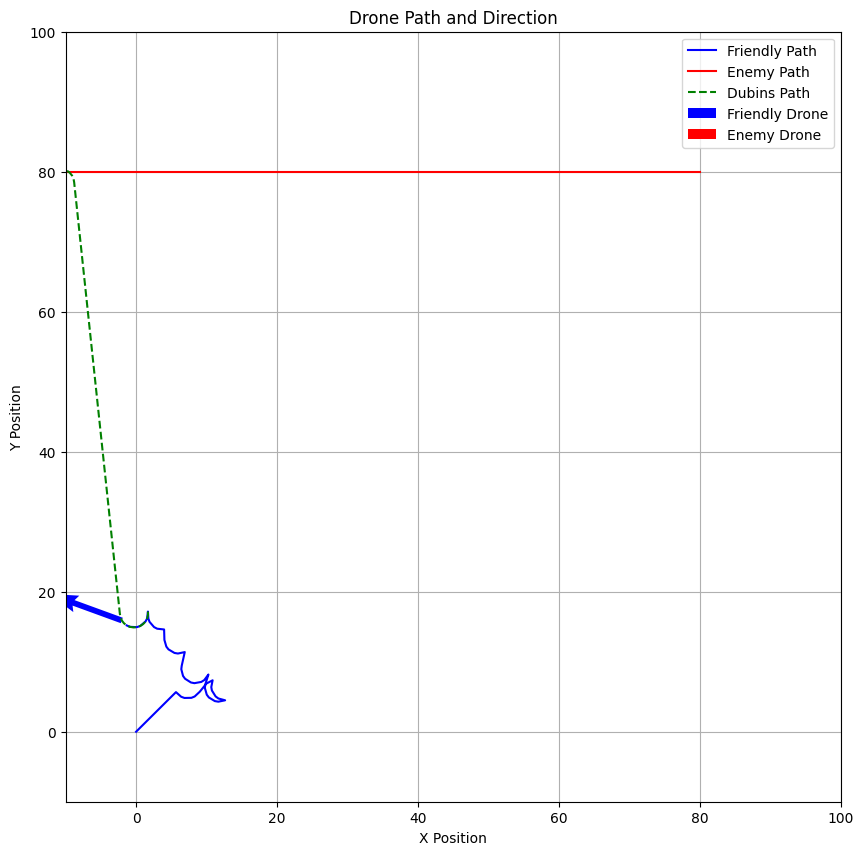

1


In [68]:
env = AirFightEnv()
state = env.reset()

for _ in range(100):
    action = env.action_space.sample()  # 随机选择一个动作
    state, reward, done, info = env.step(2)
    env.render(mode='human')  # 显示图像
    print(action)
    if done:
        break

In [ ]:
###目前的问题是每次都在重新规划的，重新规划过于频繁。
##速度过慢
##如何刷新窗口的动画，而不是多次打印画面

In [ ]:
if not a:
    print(True)

In [ ]:
import numpy as 

In [ ]:
for i in range 